In [1]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from matplotlib.ticker import FuncFormatter

def format_func(x, pos):
    hours = int(x//3600)
    minutes = int((x%3600)//60)
    seconds = int(x%60)

    return "{:d}:{:02d}".format(hours, minutes)
    # return "{:d}:{:02d}:{:02d}".format(hours, minutes, seconds)

formatter = FuncFormatter(format_func)

In [3]:
clustering_times = [datetime.timedelta(hours=0),
                    datetime.timedelta(hours=1),
                    datetime.timedelta(hours=2),
                    datetime.timedelta(hours=3)]
waiting_times = [datetime.timedelta(hours=2,minutes=1),
                 datetime.timedelta(hours=1,minutes=53),
                 datetime.timedelta(hours=2,minutes=40),
                 datetime.timedelta(hours=3,minutes=8)]
salt_intrusion = [63.36,55.01,44.22,18.81]

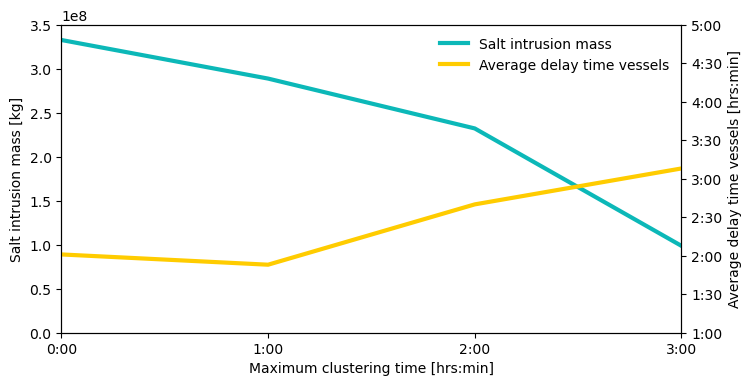

In [6]:
fig,axes = plt.subplots(figsize=[8,4])
ax = axes
ax.xaxis.set_major_formatter(formatter)
color1 = [12/255,184/255,184/255]
color2 = [255/255,204/255,0/255]
salinity, = ax.plot([time.total_seconds() for time in clustering_times],
                    [mass*25*500*40*10.5 for mass in salt_intrusion],color=color1,linewidth=3)
ax.set_xlabel('Maximum clustering time [hrs:min]')
ax.set_ylabel('Salt intrusion mass [kg]')
ax.set_xlim(0,3*3600)
ax.set_ylim(0,3.5*10**8)
ax.set_xticks(np.arange(0,3*3600+3600,3600))
ax = axes.twinx()

ax.yaxis.set_major_formatter(formatter)
waiting_time, = ax.plot([time.total_seconds() for time in clustering_times],
                        [time.total_seconds() for time in waiting_times],color=color2,linewidth=3)
ax.set_ylim(3600,3*3600)
ax.set_yticks(np.arange(3600,5*3600+1800,1800))
ax.set_ylabel('Average delay time vessels [hrs:min]')
ax.legend([salinity,waiting_time],['Salt intrusion mass','Average delay time vessels'],bbox_to_anchor=[1,1],frameon=False)
fig.savefig('Trade_off.svg',dpi=500,format='svg',bbox_inches='tight')